# **LIBRARIES IMPORTING**

In [ ]:
!pip install matplotlib pyarrow pandas matplotlib seaborn --q

In [ ]:
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **DATASET INFO**

In [ ]:
data_jan = pq.read_table('fhvhv_tripdata_2021-01.parquet')
data_jan = data_jan.to_pandas()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_jan.describe()

,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,1.190847e+07,1.190847e+07,1.190847e+07,1.190847e+07,1.190847e+07,1.190847e+07,1.190847e+07,1.190847e+07,1.190847e+07,5920.0,1.190847e+07,1.190847e+07
mean,1.348616e+02,1.386194e+02,4.512293e+00,9.542893e+02,1.719294e+01,7.090513e-01,5.285122e-01,1.482194e+00,8.669806e-01,0.0,4.997583e-01,1.392240e+01
std,7.660022e+01,7.862278e+01,5.020948e+00,6.240636e+02,1.324411e+01,2.974593e+00,4.520942e-01,1.132610e+00,1.280446e+00,0.0,1.789407e+00,1.108822e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.469000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,-1.165000e+01
25%,6.900000e+01,7.100000e+01,1.560000e+00,5.240000e+02,8.700000e+00,0.000000e+00,2.600000e-01,7.500000e-01,0.000000e+00,0.0,0.000000e+00,6.680000e+00
50%,1.360000e+02,1.390000e+02,2.840000e+00,8.040000e+02,1.330000e+01,0.000000e+00,3.900000e-01,1.140000e+00,0.000000e+00,0.0,0.000000e+00,1.063000e+01
75%,2.080000e+02,2.130000e+02,5.570000e+00,1.216000e+03,2.120000e+01,0.000000e+00,6.400000e-01,1.850000e+00,2.750000e+00,0.0,0.000000e+00,1.728000e+01
max,2.650000e+02,2.650000e+02,7.389500e+02,5.914300e+04,1.532670e+03,1.139700e+02,4.785000e+01,1.403000e+02,5.500000e+00,0.0,2.000000e+02,1.041770e+03


In [ ]:
data_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11908468 entries, 0 to 11908467
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [ ]:
data_jan.shape

(11908468, 24)

In [ ]:
!ls

 fhvhv_tripdata_2021-01.parquet     'Uber Rides - EDA Notebook.ipynb'
 IMG_20230324_174214.jpg	     Untitled1.ipynb
'nyc 2021-01-01 to 2021-12-31.csv'   Untitled.ipynb
 taxi_zone_lookup.csv


In [ ]:
weather = pd.read_csv("nyc 2021-01-01 to 2021-12-31.csv")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              365 non-null    object 
 1   address           365 non-null    object 
 2   resolvedAddress   365 non-null    object 
 3   datetime          365 non-null    object 
 4   temp              365 non-null    float64
 5   feelslike         365 non-null    float64
 6   dew               365 non-null    float64
 7   humidity          365 non-null    float64
 8   precip            365 non-null    float64
 9   precipprob        365 non-null    int64  
 10  preciptype        152 non-null    object 
 11  snow              365 non-null    float64
 12  snowdepth         365 non-null    float64
 13  windgust          292 non-null    float64
 14  windspeed         365 non-null    float64
 15  winddir           365 non-null    float64
 16  sealevelpressure  365 non-null    float64
 1

In [ ]:
lookup = pd.read_csv('taxi_zone_lookup.csv')
lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


# **DATA ANALYSIS ON ABOVE DATASET WITH RESULTS**

#### 1. Total miles traveled by passengers in comparison to morning, afternoon, night:


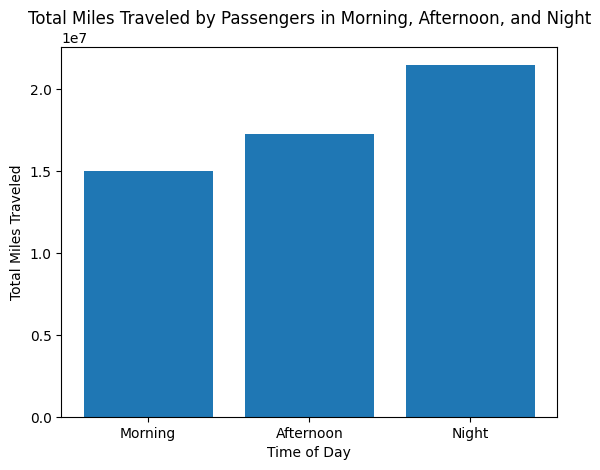

In [ ]:
data_jan['pickup_datetime'] = pd.to_datetime(data_jan['pickup_datetime'])

morning = (data_jan['pickup_datetime'].dt.hour >= 5) & (data_jan['pickup_datetime'].dt.hour < 12)
afternoon = (data_jan['pickup_datetime'].dt.hour >= 12) & (data_jan['pickup_datetime'].dt.hour < 18)
night = (data_jan['pickup_datetime'].dt.hour >= 18) | (data_jan['pickup_datetime'].dt.hour < 5)

morning_miles = data_jan[morning]['trip_miles'].sum()
afternoon_miles = data_jan[afternoon]['trip_miles'].sum()
night_miles = data_jan[night]['trip_miles'].sum()

## Plot the results ##
plt.bar(['Morning', 'Afternoon', 'Night'], [morning_miles, afternoon_miles, night_miles])
plt.xlabel('Time of Day')
plt.ylabel('Total Miles Traveled')
plt.title('Total Miles Traveled by Passengers in Morning, Afternoon, and Night')
plt.show()

#### 2. The number of trips pickups occurs every 2hrs in a day (any random day):

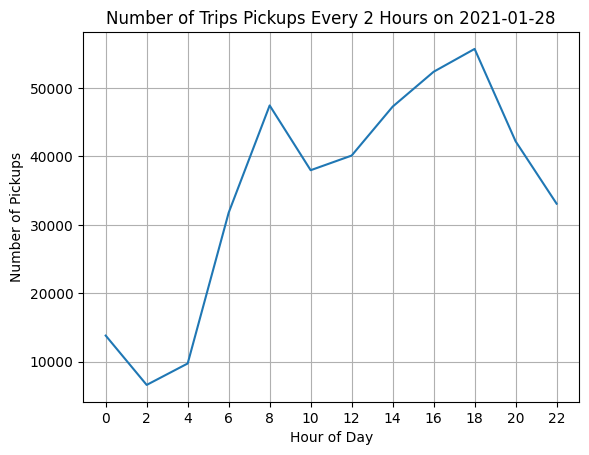

In [ ]:
random_day = data_jan['pickup_datetime'].dt.date.sample().values[0]


random_day_data = data_jan[data_jan['pickup_datetime'].dt.date == random_day]

pickup_counts = random_day_data.groupby(pd.Grouper(key='pickup_datetime', freq='2H')).count()

## Plot the results ##
plt.plot(pickup_counts.index.hour, pickup_counts['trip_miles'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.title(f'Number of Trips Pickups Every 2 Hours on {random_day}')
plt.xticks(range(0, 24, 2))
plt.grid()
plt.show()

#### 3. In a month, the most visited destinations were traveled by passengers in NYC City:
 

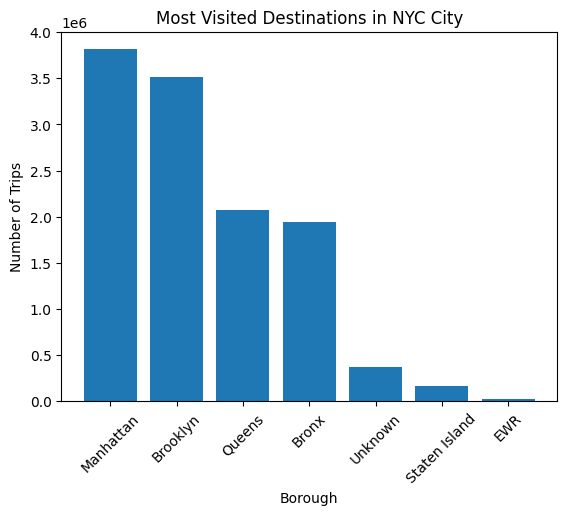

In [ ]:
merged_data = data_jan.merge(lookup, left_on='DOLocationID', right_on='LocationID', how='left')

borough_counts = merged_data.groupby('Borough')['trip_miles'].count().sort_values(ascending=False)

## Plot the results ##
plt.bar(borough_counts.index, borough_counts.values)
plt.xlabel('Borough')
plt.ylabel('Number of Trips')
plt.title('Most Visited Destinations in NYC City')
plt.xticks(rotation=45)
plt.show()


#### 4. Which hire (Uber, Via, Lyft, Juno) is used by the customer based on distance and price?


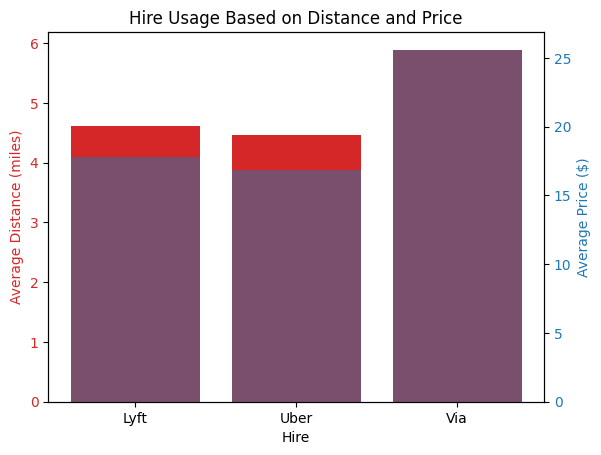

In [ ]:
## Create a dictionary to map hvfhs_license_num to hire names ##
hire_map = {'HV0002': 'Juno', 'HV0003': 'Uber', 'HV0004': 'Via', 'HV0005': 'Lyft'}

data_jan['hire'] = data_jan['hvfhs_license_num'].map(hire_map)

average_distance_price = data_jan.groupby('hire').agg({'trip_miles': 'mean', 'base_passenger_fare': 'mean'})

## Plot the results ##
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Hire')
ax1.set_ylabel('Average Distance (miles)', color=color)
ax1.bar(average_distance_price.index, average_distance_price['trip_miles'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Price ($)', color=color)
ax2.bar(average_distance_price.index, average_distance_price['base_passenger_fare'], color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Hire Usage Based on Distance and Price')
plt.show()

#### 5. How does the demand for hire vehicles change throughout the day and week



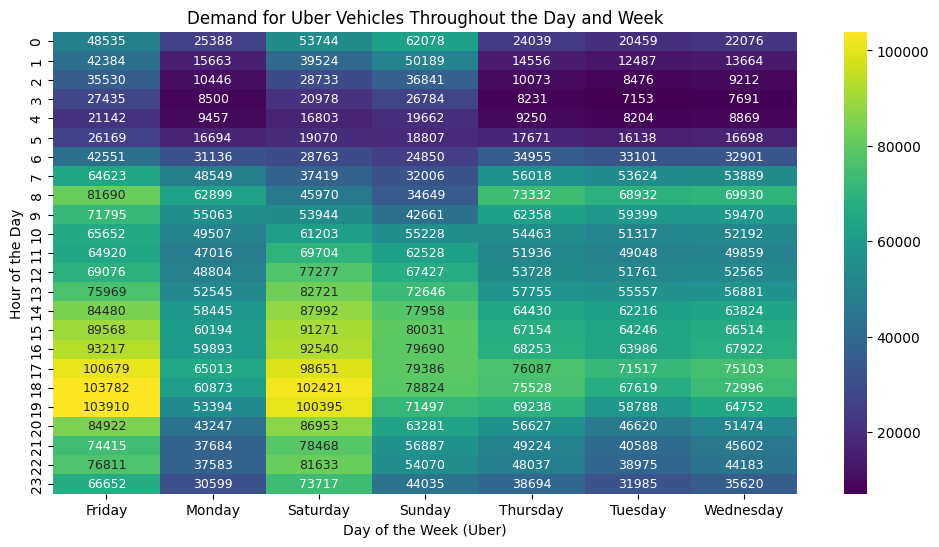

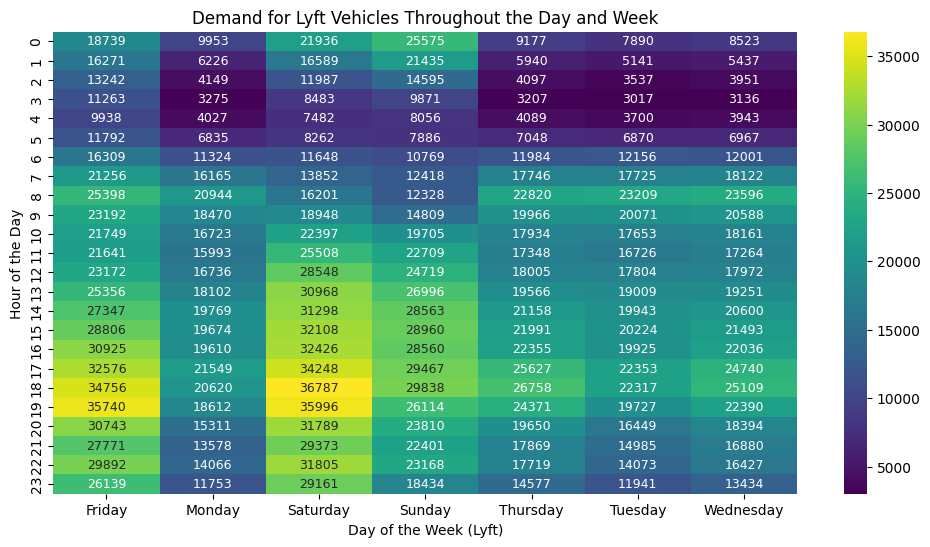

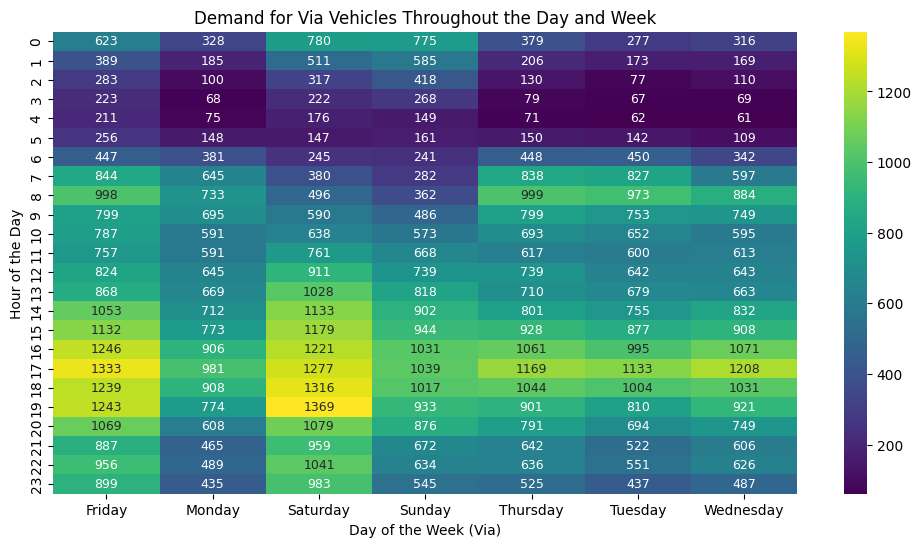

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_jan['hour'] = data_jan['pickup_datetime'].dt.hour
data_jan['day_of_week'] = data_jan['pickup_datetime'].dt.day_name()

trips_by_hour_day = data_jan.groupby(['hire', 'hour', 'day_of_week']).size().reset_index(name='trips')


trips_pivot = trips_by_hour_day.pivot_table(index=['hour'], columns=['day_of_week', 'hire'], values='trips').fillna(0)


hire_vehicles = data_jan['hire'].unique()

for hire in hire_vehicles:
    plt.figure(figsize=(12, 6))
    sns.heatmap(trips_pivot.xs(hire, axis=1, level=1), cmap='viridis', annot=True, fmt='.0f', annot_kws={"size": 9})
    plt.xlabel(f'Day of the Week ({hire})')
    plt.ylabel('Hour of the Day')
    plt.title(f'Demand for {hire} Vehicles Throughout the Day and Week')
    plt.show()


#### 6.Are there any trends or patterns in the types of hire vehicles  requested at different times or locations in the Uber NYC for-hire vehicles trip data 2021 dataset?


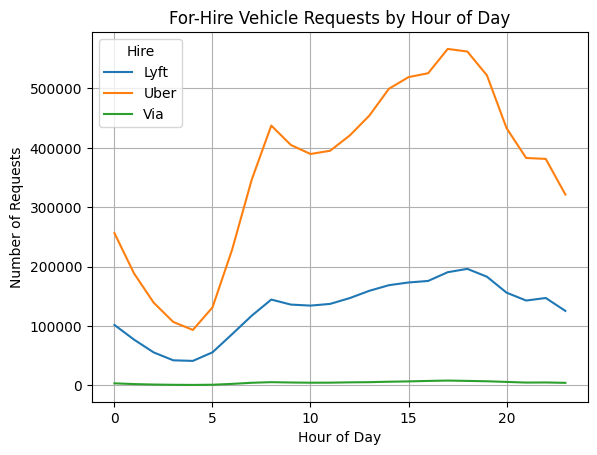

In [ ]:
data_jan['hour_of_day'] = data_jan['pickup_datetime'].dt.hour

hourly_hire_data = data_jan.groupby(['hire', 'hour_of_day']).size().unstack(level=0)

hourly_hire_data = data_jan.groupby(['hire', 'hour_of_day']).size().unstack(level=0)

## Plot the results ##
hourly_hire_data.plot()
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.title('For-Hire Vehicle Requests by Hour of Day')
plt.legend(title='Hire')
plt.grid()
plt.show()


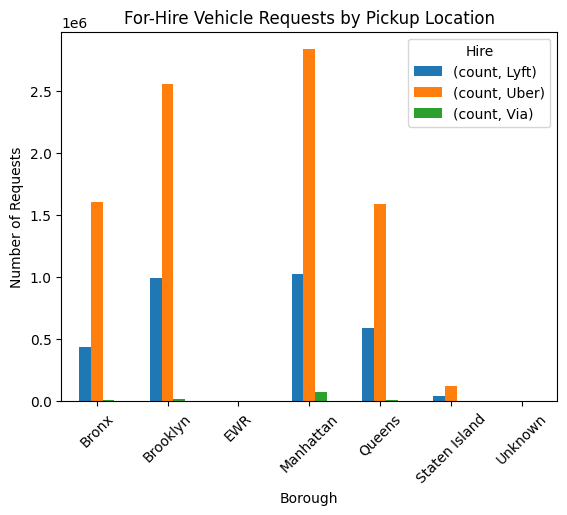

In [ ]:
pickup_location_counts = data_jan.groupby(['hire', 'PULocationID']).size().reset_index(name='count')

pickup_location_counts = pickup_location_counts.merge(lookup, left_on='PULocationID', right_on='LocationID', how='left')

pickup_location_counts = pickup_location_counts.groupby(['hire', 'Borough']).agg({'count': 'sum'})

## Plot the results for pickup locations ##
pickup_location_counts.unstack(level=0).plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Number of Requests')
plt.title('For-Hire Vehicle Requests by Pickup Location')
plt.legend(title='Hire')
plt.xticks(rotation=45)
plt.show()

#### 7.Are there any differences in the average fare amount across different types of for-hire vehicles or pick-up/drop-off locations?


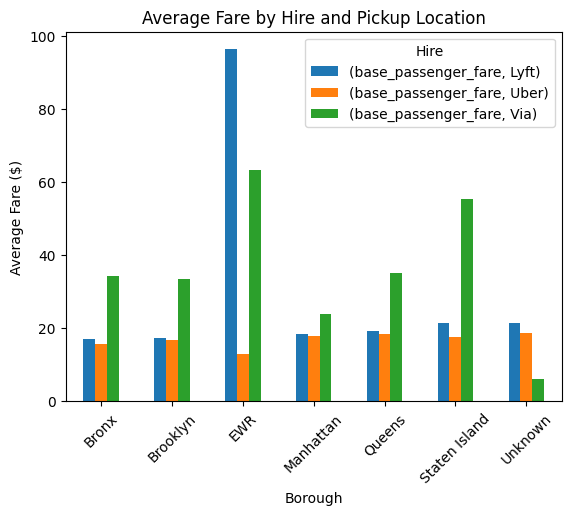

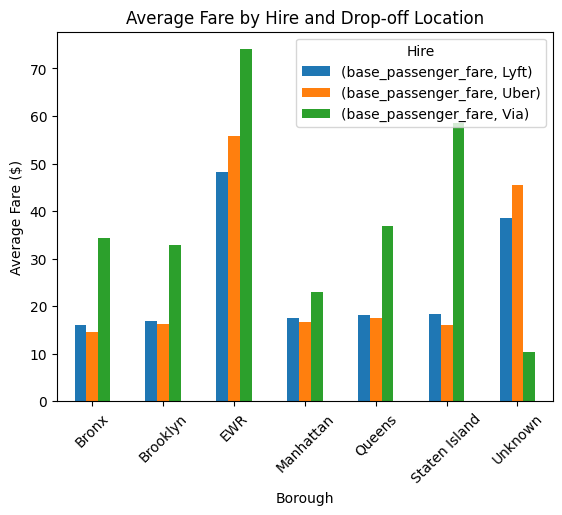

In [ ]:
average_fare_by_pickup = data_jan.groupby(['hire', 'PULocationID']).agg({'base_passenger_fare': 'mean'})

average_fare_by_dropoff = data_jan.groupby(['hire', 'DOLocationID']).agg({'base_passenger_fare': 'mean'})

average_fare_by_pickup = average_fare_by_pickup.reset_index().merge(lookup, left_on='PULocationID', right_on='LocationID', how='left')
average_fare_by_dropoff = average_fare_by_dropoff.reset_index().merge(lookup, left_on='DOLocationID', right_on='LocationID', how='left')

average_fare_by_pickup_borough = average_fare_by_pickup.groupby(['hire', 'Borough']).agg({'base_passenger_fare': 'mean'})
average_fare_by_dropoff_borough = average_fare_by_dropoff.groupby(['hire', 'Borough']).agg({'base_passenger_fare': 'mean'})

## Plot the results for pickup locations ##
average_fare_by_pickup_borough.unstack(level=0).plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Average Fare ($)')
plt.title('Average Fare by Hire and Pickup Location')
plt.legend(title='Hire')
plt.xticks(rotation=45)
plt.show()

## Plot the results for drop-off locations ##
average_fare_by_dropoff_borough.unstack(level=0).plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Average Fare ($)')
plt.title('Average Fare by Hire and Drop-off Location')
plt.legend(title='Hire')
plt.xticks(rotation=45)
plt.show()

#### 8. Preferred pickup and drop-off locations, the average length of their rides, and how long they are willing to wait for a ride:


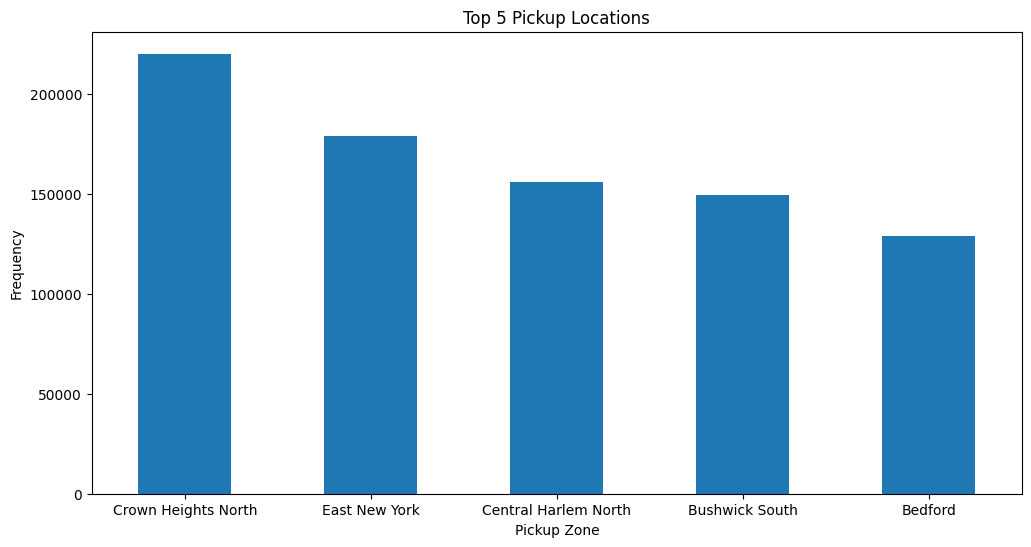

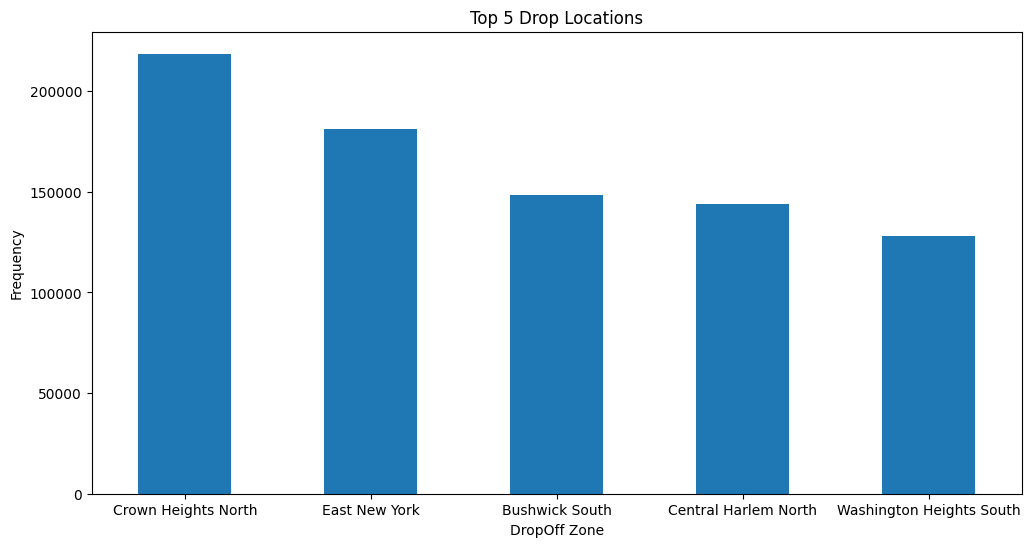

In [ ]:
location_id_to_zone = dict(zip(lookup['LocationID'], lookup['Zone']))
data_jan['PUZone'] = data_jan['PULocationID'].map(location_id_to_zone)
pickup_counts = data_jan['PUZone'].value_counts().head()

location_id_to_zone = dict(zip(lookup['LocationID'], lookup['Zone']))
data_jan['DOZone'] = data_jan['DOLocationID'].map(location_id_to_zone)
dropoff_counts = data_jan['DOZone'].value_counts().head()


plt.figure(figsize=(12, 6))
pickup_counts.plot(kind='bar')
plt.xlabel('Pickup Zone')
plt.ylabel('Frequency')
plt.title('Top 5 Pickup Locations')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(12, 6))
dropoff_counts.plot(kind='bar')
plt.xlabel('DropOff Zone')
plt.ylabel('Frequency')
plt.title('Top 5 Drop Locations')
plt.xticks(rotation=0)
plt.show()



#### 9. Hire Vehicles with the highest number of trips in each period


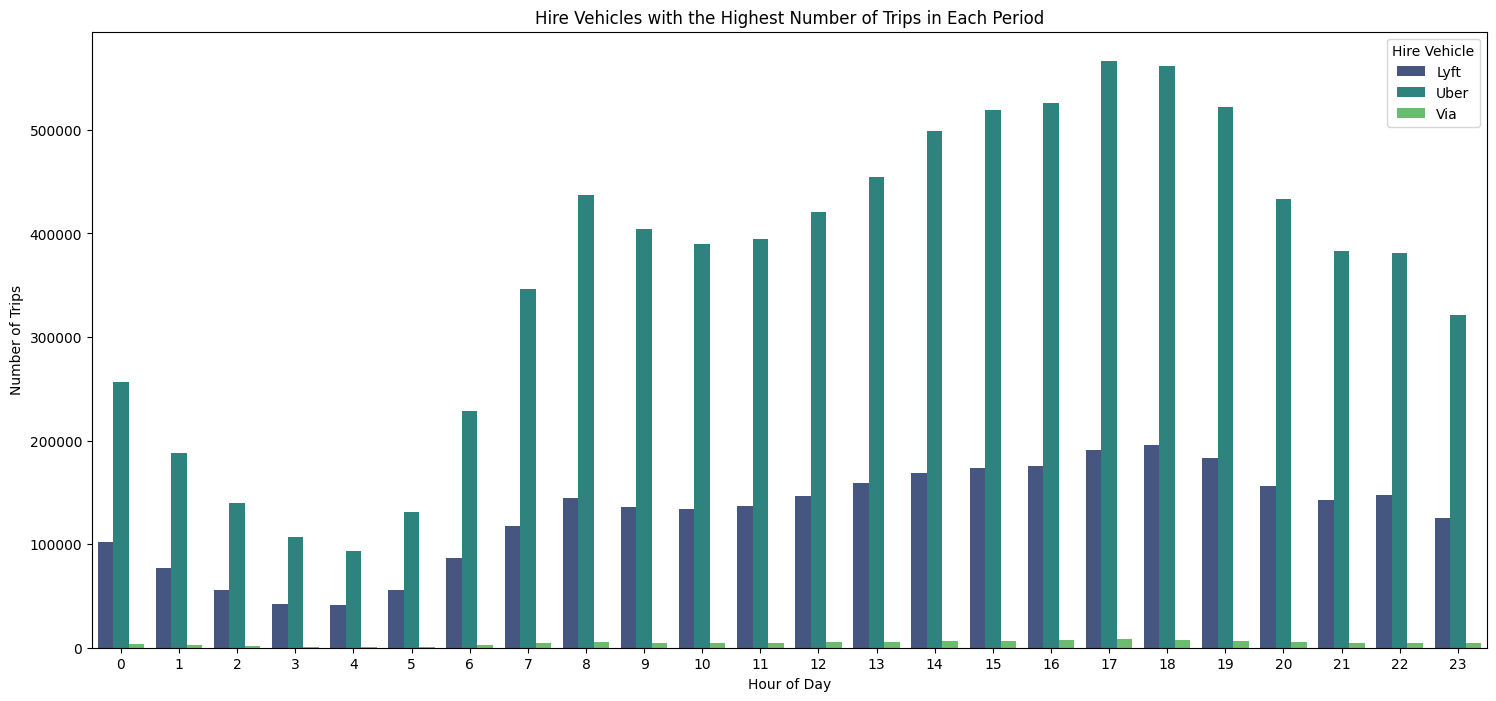

In [ ]:
hire_vehicle_mapping = {
    'HV0002': 'Juno',
    'HV0003': 'Uber',
    'HV0004': 'Via',
    'HV0005': 'Lyft'
}

data_jan['hire_vehicle'] = data_jan['hvfhs_license_num'].map(hire_vehicle_mapping)

data_jan['pickup_hour'] = data_jan['pickup_datetime'].dt.hour
grouped_data = data_jan.groupby(['hire_vehicle', 'pickup_hour']).size().reset_index(name='trip_count')

## Plot the number of trips for each hire vehicle and period ##
plt.figure(figsize=(18, 8))
sns.barplot(data=grouped_data, x='pickup_hour', y='trip_count', hue='hire_vehicle', palette='viridis')
plt.title('Hire Vehicles with the Highest Number of Trips in Each Period')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend(title='Hire Vehicle')
plt.show()

#### 10. What is the average trip distance and duration for each hire vehicle

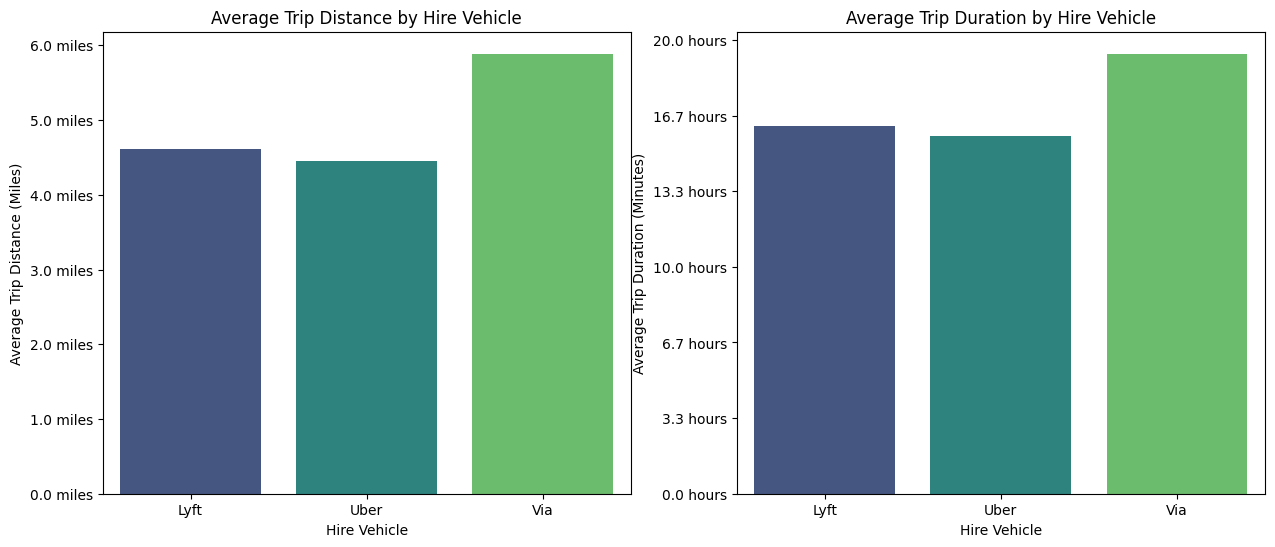

In [ ]:
avg_trip_data = data_jan.groupby('hire_vehicle').agg({'trip_miles': 'mean', 'trip_time': 'mean'}).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=avg_trip_data, x='hire_vehicle', y='trip_miles', ax=ax[0], palette='viridis')
ax[0].set_xlabel('Hire Vehicle')
ax[0].set_ylabel('Average Trip Distance (Miles)')
ax[0].set_title('Average Trip Distance by Hire Vehicle')

ax[0].set_yticklabels([f"{x:.1f} miles" for x in ax[0].get_yticks()])

sns.barplot(data=avg_trip_data, x='hire_vehicle', y='trip_time', ax=ax[1], palette='viridis')
ax[1].set_xlabel('Hire Vehicle')
ax[1].set_ylabel('Average Trip Duration (Minutes)')
ax[1].set_title('Average Trip Duration by Hire Vehicle')

# Format y-axis tick labels for trip_time
ax[1].set_yticklabels([f"{x/60:.1f} hours" for x in ax[1].get_yticks()])

plt.show()


#### 11. Relationship b/w Pick-up location and trip destination

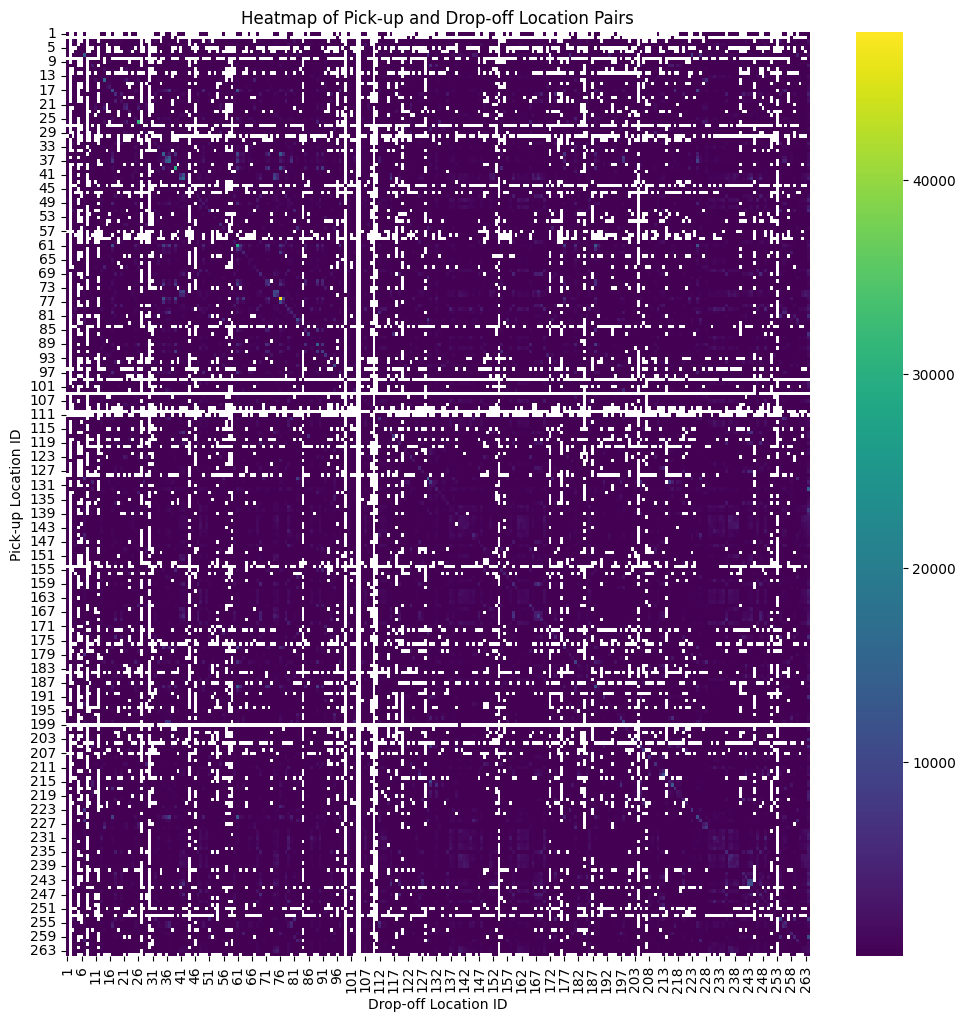

In [ ]:
import pandas as pd

# Create a pivot table of the count of pick-up and drop-off location pairs
location_pairs = data_jan.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='count')
location_pairs_pivot = location_pairs.pivot('PULocationID', 'DOLocationID', 'count')

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(location_pairs_pivot, cmap='viridis')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Pick-up Location ID')
plt.title('Heatmap of Pick-up and Drop-off Location Pairs')
plt.show()


#### 12. Average passenger fare for each hire vehicle and how it varies by time or day or week:


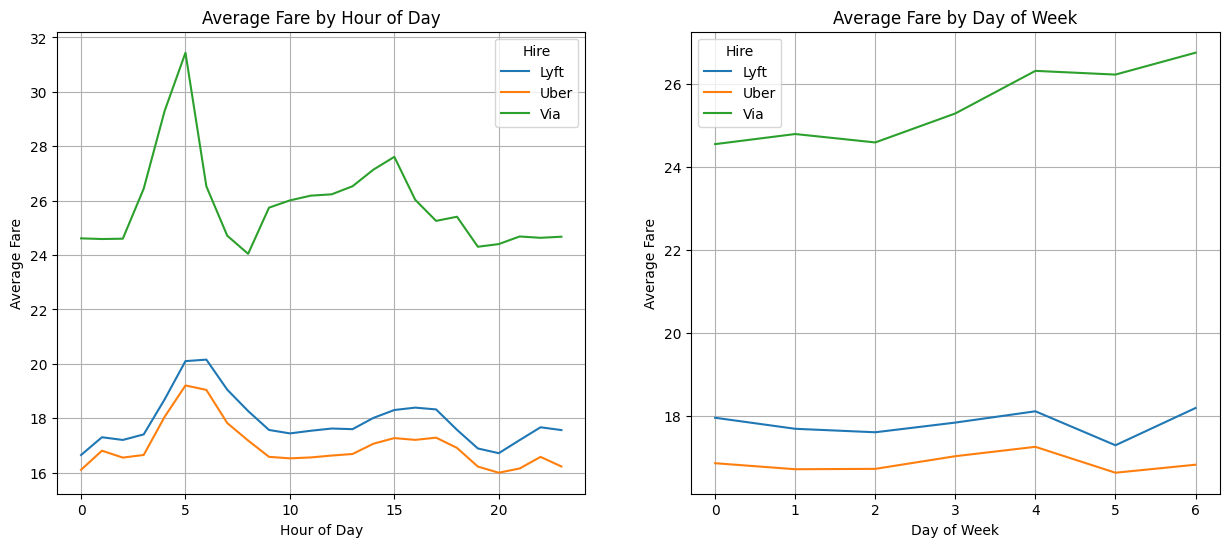

In [ ]:
average_fare_by_hour = data_jan.groupby(['hour_of_day', 'hire'])['base_passenger_fare'].mean().unstack(level=1)

data_jan['day_of_week'] = data_jan['pickup_datetime'].dt.dayofweek
average_fare_by_day = data_jan.groupby(['day_of_week', 'hire'])['base_passenger_fare'].mean().unstack(level=1)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

average_fare_by_hour.plot(ax=ax[0])
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Average Fare')
ax[0].set_title('Average Fare by Hour of Day')
ax[0].legend(title='Hire')
ax[0].grid()

average_fare_by_day.plot(ax=ax[1])
ax[1].set_xlabel('Day of Week')
ax[1].set_ylabel('Average Fare')
ax[1].set_title('Average Fare by Day of Week')
ax[1].legend(title='Hire')
ax[1].grid()

plt.show()


#### 13. Drivers' earnings per trip on average and comparison across different hire vehicles:

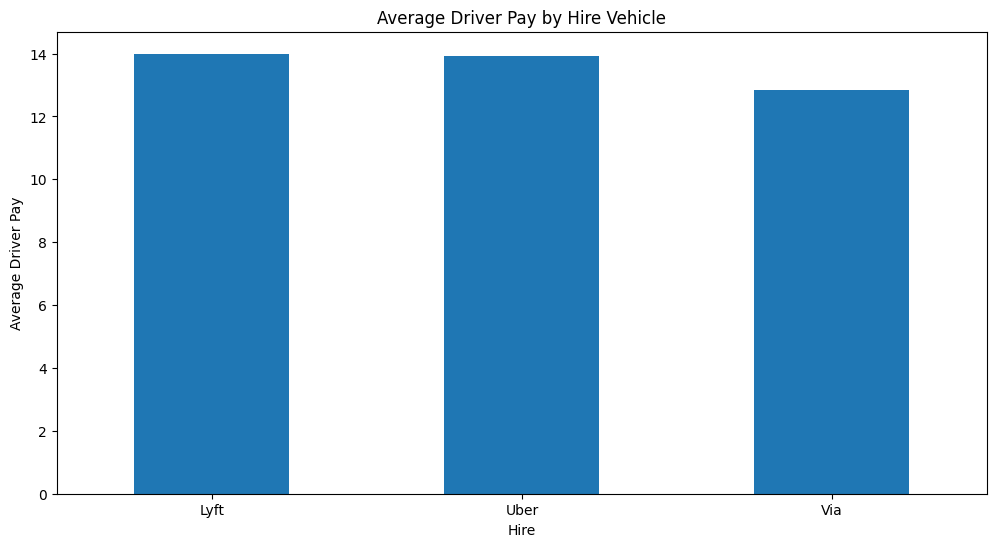

In [ ]:
average_driver_pay_by_hire = data_jan.groupby('hire')['driver_pay'].mean()

plt.figure(figsize=(12, 6))
average_driver_pay_by_hire.plot(kind='bar')
plt.xlabel('Hire')
plt.ylabel('Average Driver Pay')
plt.title('Average Driver Pay by Hire Vehicle')
plt.xticks(rotation=0)
plt.show()


#### 14. Percentage of trips that are shared/pooled rides and how it varies by hire vehicle:


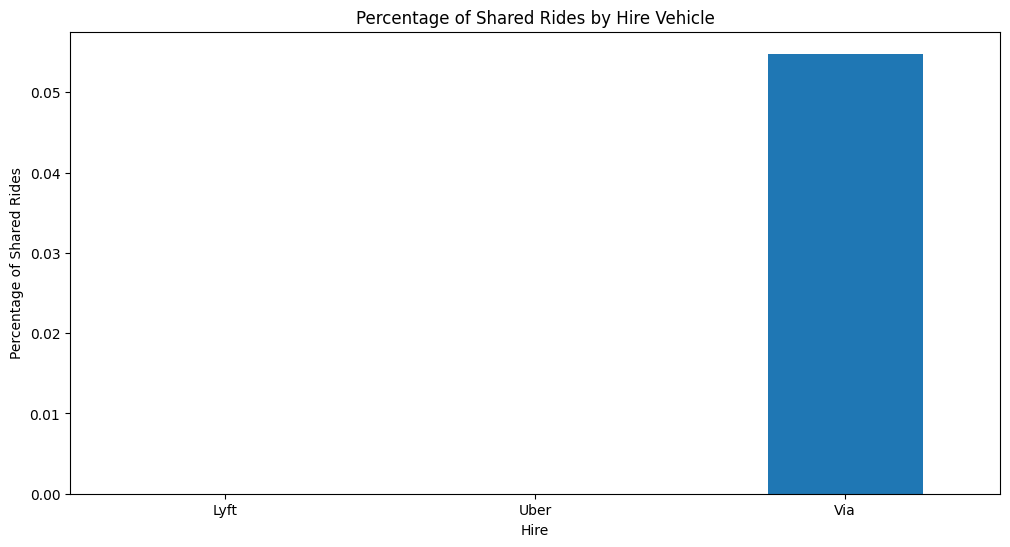

In [ ]:
shared_ride_counts_by_hire = data_jan.groupby('hire')['shared_request_flag'].value_counts(normalize=True).unstack(level=1).fillna(0)

plt.figure(figsize=(12, 6))
shared_ride_counts_by_hire['Y'].plot(kind='bar')
plt.xlabel('Hire')
plt.ylabel('Percentage of Shared Rides')
plt.title('Percentage of Shared Rides by Hire Vehicle')
plt.xticks(rotation=0)
plt.show()


#### 15. Are there certain taxi zones with a higher volume of trips and if so  which ones and why?

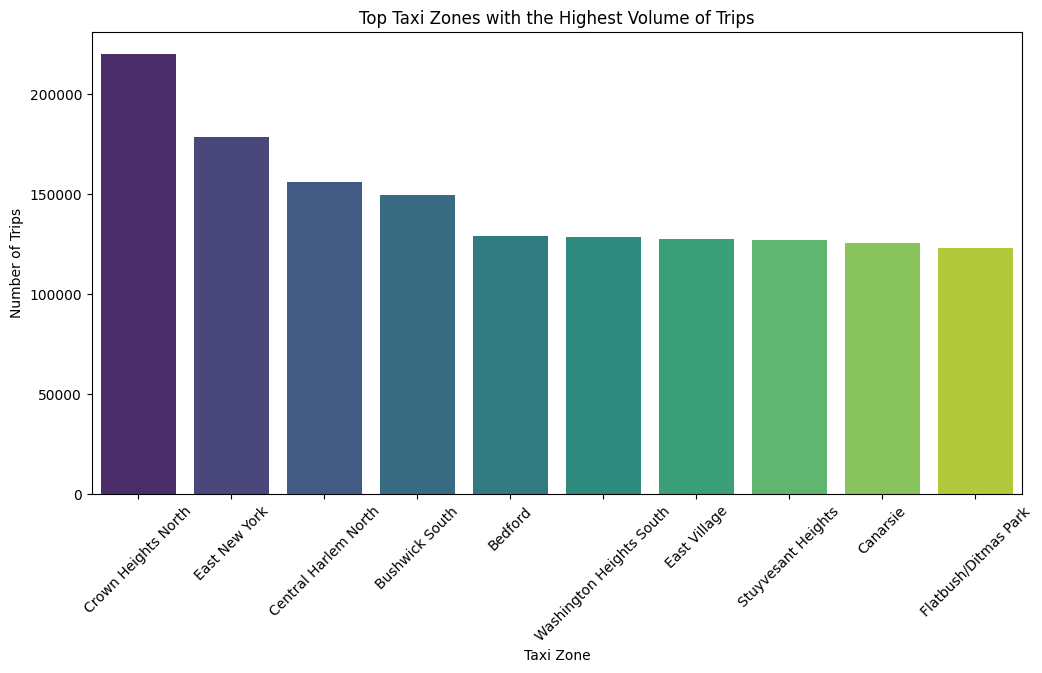

In [ ]:
merged_data = data_jan.merge(lookup, left_on='PULocationID', right_on='LocationID', how='left')

trips_by_zone = merged_data.groupby('Zone')['trip_miles'].count().reset_index().sort_values(by='trip_miles', ascending=False)

top_zones = trips_by_zone.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_zones, x='Zone', y='trip_miles', palette='viridis')
plt.xlabel('Taxi Zone')
plt.ylabel('Number of Trips')
plt.title('Top Taxi Zones with the Highest Volume of Trips')
plt.xticks(rotation=45)
plt.show()


#### 16. How does the amount of tolls,taxes and fees collected vary across different hire vehicles and periods?

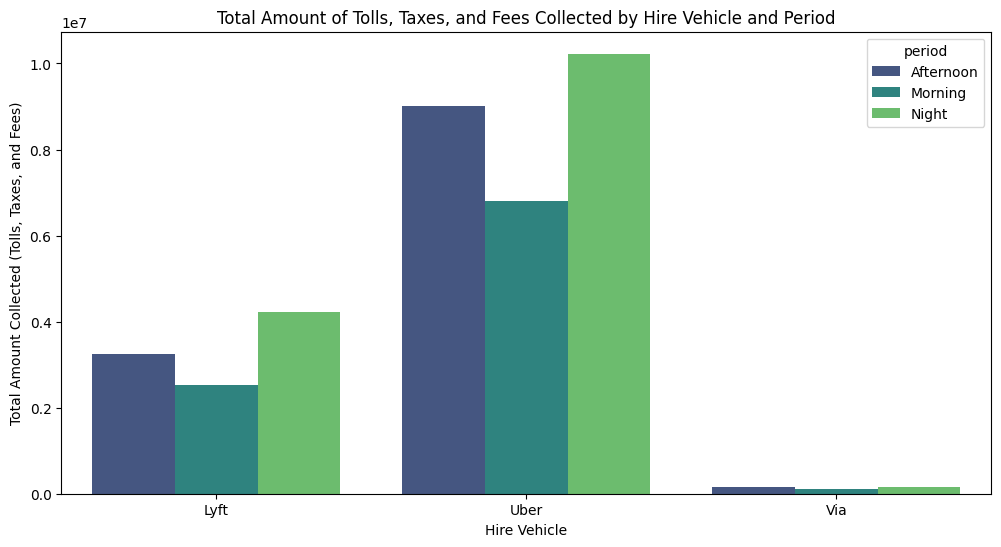

In [ ]:
def get_period_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

data_jan['period'] = data_jan['pickup_datetime'].dt.hour.apply(get_period_of_day)


tolls_taxes_fees_by_hire_period = data_jan.groupby(['hire_vehicle', 'period']).agg(
    {'tolls': 'sum', 'sales_tax': 'sum', 'congestion_surcharge': 'sum', 'airport_fee': 'sum'}).reset_index()


tolls_taxes_fees_by_hire_period['total'] = tolls_taxes_fees_by_hire_period[
    ['tolls', 'sales_tax', 'congestion_surcharge', 'airport_fee']].sum(axis=1)

## Visualize the total amount of tolls, taxes, and fees collected by hire vehicle and period ##

plt.figure(figsize=(12, 6))
sns.barplot(data=tolls_taxes_fees_by_hire_period, x='hire_vehicle', y='total', hue='period', palette='viridis')
plt.xlabel('Hire Vehicle')
plt.ylabel('Total Amount Collected (Tolls, Taxes, and Fees)')
plt.title('Total Amount of Tolls, Taxes, and Fees Collected by Hire Vehicle and Period')
plt.show()


#### 17. what is the overall profatability of each hire vehicle and how has it changed over time?

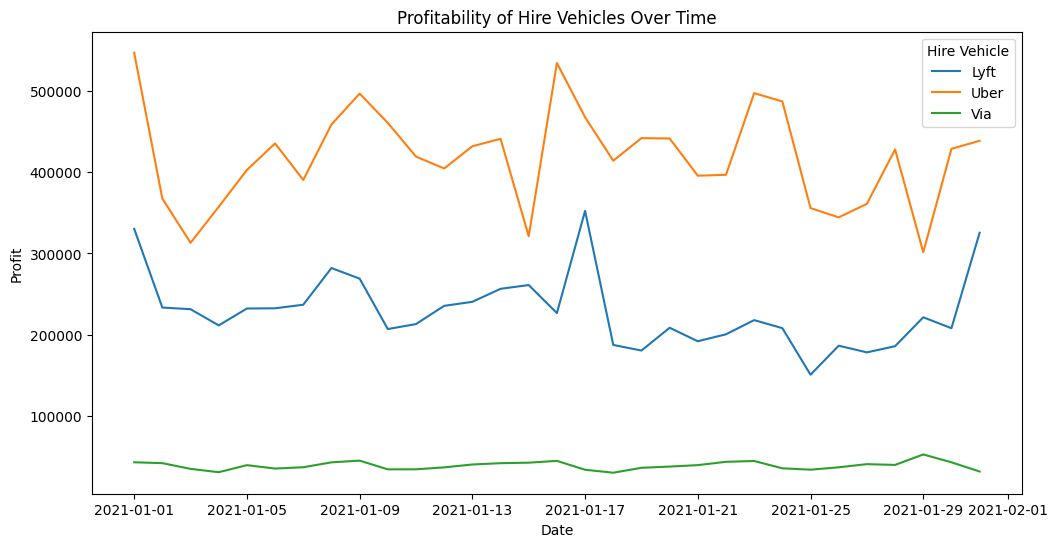

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Profit => Base Passenger Fee - (driver_pay + sales_tax)

data_jan['profit'] = data_jan['base_passenger_fare'] - data_jan['driver_pay']  - data_jan['sales_tax']

profit_by_hire_and_date = data_jan.groupby(['hire', data_jan['pickup_datetime'].dt.date])['profit'].sum().reset_index()

profit_by_hire_and_date.columns = ['hire', 'date', 'profit']

## Plot the profitability over time for each hire vehicle ##
plt.figure(figsize=(12, 6))
sns.lineplot(data=profit_by_hire_and_date, x='date', y='profit', hue='hire')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profitability of Hire Vehicles Over Time')
plt.legend(title='Hire Vehicle')
plt.show()
